# Python notebook to reproduce _Supplementary Figure 8_

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_8/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
with open('results/TCGA/cancer_patient_counts.txt', 'r') as f:
    total_counts = json.load(f)
    
obs_counts = total_counts['observed_patients']
ret_counts = total_counts['retained_patients']
all_counts = total_counts['all_patients']

# Code to reproduce Supplementary Fig. 8

Supplementary Fig. 8

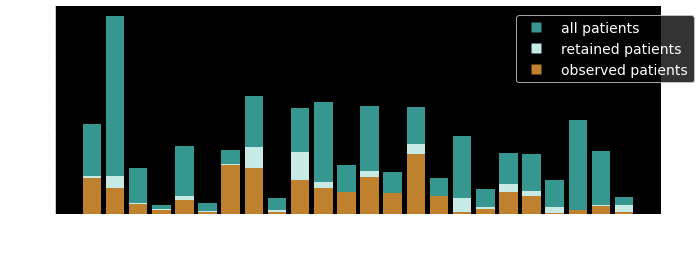

In [5]:
%matplotlib inline

colors = [plot_settings.get_model_colors(m) for m in ['linear', 'Sagittarius', 'seq_by_seq_RNN']]
edge = plot_settings.get_model_colors('mTAN')
ax = plot_settings.get_wider_axis(double=True)
ct_ordering = sorted(obs_counts)
plot_utils.bar_plot(ax, [all_counts[ct] for ct in ct_ordering], ct_ordering,
                    'cancer type', '# patients', rotangle=45, color=colors[0], edge_color=edge)
plot_utils.bar_plot(ax, [ret_counts[ct] for ct in ct_ordering], ct_ordering,
                    'cancer type', '# patients', rotangle=45, color=colors[1], edge_color=edge)
plot_utils.bar_plot(ax, [obs_counts[ct] for ct in ct_ordering], ct_ordering,
                    'Cancer Type', '# patients', rotangle=45, color=colors[2], edge_color=edge)

names = ['all patients', 'retained patients', 'observed patients']
lp = lambda i: plt.plot([],color=colors[i], ms=10, mec="none",
                        label=names[i], ls="", marker='s')[0]
handles = [lp(i) for i in range(3)]
plot_utils.format_legend(ax, handles, names)
plot_utils.put_legend_outside_plot(ax, anchorage=(0.75, 0.6))
plt.tight_layout()
plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_8.pdf')